<a href="https://colab.research.google.com/github/prasannashrestha011/Understanding-tensors/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import math
from d2l import torch as d2l
import numpy as np

In [ ]:
##adding up column to the row,resulting tensor in one D
X = torch.tensor([[1, 2, 3], [4, 5, 6]])
X.sum(axis=1)

tensor([ 6, 15])

In [ ]:
#obtaining mean of tensor
X.sum()/X.numel()

tensor(3.5000)

In [ ]:
#non reduction form of dimension by adding up rows and cols
X.sum(axis=0,keepdim=True)

tensor([[5, 7, 9]])

In [ ]:
A=torch.tensor([[1,2],[3,4]])
A_sum=A.sum(axis=1,keepdim=True)
normalized_A=A/A_sum
normalized_A

tensor([[0.3333, 0.6667],
        [0.4286, 0.5714]])

In [ ]:
A=torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print("Row cumulative sum= ",A.cumsum(axis=0))
print("Column cumulative sum: \n ",A.cumsum(axis=1))

Row cumulative sum=  tensor([[ 1,  2,  3],
        [ 5,  7,  9],
        [12, 15, 18]])
Column cumulative sum: 
  tensor([[ 1,  3,  6],
        [ 4,  9, 15],
        [ 7, 15, 24]])


In [ ]:
X=torch.tensor([1,2,3,4])
Y=torch.tensor([5,6,7,8])
print(torch.dot(X,Y))
print(torch.sum(X*Y))

tensor(70)
tensor(70)


In [ ]:
A=torch.tensor([[1,2,3],[4,5,6]],dtype=torch.float32)
x=torch.tensor([1,2,3],dtype=torch.float32)
y=torch.zeros(2,dtype=torch.float32)
y[0]=torch.dot(A[0],x)
y[1]=torch.dot(A[1],x)
y



tensor([14., 32.])

In [ ]:
A=torch.ones(2,1)
B=torch.ones(1,2)
A,B,torch.matmul(A,B)

(tensor([[1.],
         [1.]]),
 tensor([[1., 1.]]),
 tensor([[1., 1.],
         [1., 1.]]))

In [ ]:
x=torch.tensor([1,2,100],dtype=torch.float32)
l1=torch.abs(x).sum()
l2=torch.norm(x)
l1,l2

(tensor(103.), tensor(100.0250))

In [ ]:
#transpose of A.T.T=A
A=torch.tensor([[1,2,3],[4,5,6]])
A_T=A.T
A_T_T=A_T.T
A,A_T,A_T_T

(tensor([[1, 2, 3],
         [4, 5, 6]]),
 tensor([[1, 4],
         [2, 5],
         [3, 6]]),
 tensor([[1, 2, 3],
         [4, 5, 6]]))

In [ ]:
#A^T+B^T=(A+B)^T
A=torch.rand(4,4,dtype=torch.float32)
B=torch.rand(4,4,dtype=torch.float32)
A_T=A.T
B_T=B.T
A_T+B_T,(A+B).T

(tensor([[0.8933, 0.9299, 0.8157, 1.0612],
         [1.0247, 0.1735, 1.0951, 1.0116],
         [0.6813, 0.9744, 1.4751, 0.5742],
         [1.1161, 1.2829, 1.0921, 1.9771]]),
 tensor([[0.8933, 0.9299, 0.8157, 1.0612],
         [1.0247, 0.1735, 1.0951, 1.0116],
         [0.6813, 0.9744, 1.4751, 0.5742],
         [1.1161, 1.2829, 1.0921, 1.9771]]))

In [ ]:
A=torch.rand(3,3,dtype=torch.float32)
A_T=A.T
A, A+A_T

(tensor([[0.2926, 0.1473, 0.7392],
         [0.7795, 0.0023, 0.2239],
         [0.1436, 0.1485, 0.9477]]),
 tensor([[0.5852, 0.9268, 0.8828],
         [0.9268, 0.0046, 0.3724],
         [0.8828, 0.3724, 1.8954]]))

In [ ]:
X=torch.randn(1,2,3,4)
len(X)

1

In [ ]:
X=torch.tensor([[1,2,3],[4,5,6]])
X/X.sum(axis=1,keepdim=True)


tensor([[0.1667, 0.3333, 0.5000],
        [0.2667, 0.3333, 0.4000]])

In [ ]:
x = torch.tensor(3.0, requires_grad=True)

# First backward pass
y = x * x         # y = x²
y.backward()
print(x.grad)

tensor(6.)


In [ ]:
#dervative
x=torch.tensor(3.0,requires_grad=True)
y=x**2
y.backward()
print(x.grad)

tensor(6.)


In [1]:
from d2l import torch as d2l

In [8]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 * (x - mu)**2 / sigma**2)

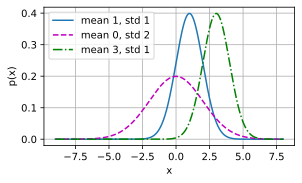

In [20]:
# Use NumPy again for visualization
x = np.arange(-9, 8, 0.01)

# Mean and standard deviation pairs
params = [(1, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])